#**Task-2:**

##Create EDA using Test Data file(Yoshops.com Sale Order file) :

###Input Value for genrate Graph chart:

Enter 1 to see the analysis of Reviews given by Customers

Enter 2 to see the analysis of different payment methods used by the Customers

Enter 3 to see the analysis of Top Consumer States of India

Enter 4 to see the analysis of Top Consumer Cities of India

Enter 5 to see the analysis of Top Selling Product Categories

Enter 6 to see the analysis of Reviews for All Product Categories

Enter 7 to see the analysis of Number of Orders Per Month Per Year

Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year

Enter 9 to see the analysis of Number of Orders Across Parts of a Day

Enter 10 to see the Full Report


### Enter the number to see the analysis of your choice: 1


### OutPut:Genrate analysis report in format PDF and Excel file

# Importing all required libraries

In [3]:
!pip install fpdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40719 sha256=86bf18713d497a7d0606d3d0160e4427e4c2ad9a53270c5f533efe6d7d7d1957
  Stored in directory: /root/.cache/pip/wheels/44/35/8b/86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9
Successfully built fpdf


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from fpdf import FPDF

# Importing the Dataset

In [10]:
review = pd.read_csv('/content/drive/MyDrive/YoShops Internship/Project Task 2/review_dataset.csv')
review

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating
...,...,...,...,...,...
1856,Hammer Pulse Oximeter Unisex Smartwatch with B...,https://yoshops.com/products/hammer-pulse-oxim...,Mumbai,NaN,NaN
1857,Hammer Sting 2.0 Wireless Bluetooth Neckband E...,https://yoshops.com/products/hammer-sting-2-0-...,Mumbai,NaN,NaN
1858,BBA Online Class Live Tuition Training Program...,https://yoshops.com/products/bba-online-class-...,Mumbai,NaN,NaN
1859,B.TECH Online Class Live Tuition Training Prog...,https://yoshops.com/products/b-tech-online-cla...,Mumbai,Reviewd,5.0 star rating


In [11]:
print(review.isnull().sum())
print((review.isnull().sum()/len(review))*100)
review = review.drop_duplicates()
print(review.shape)
print(review.dtypes)
print(review.nunique())
print(review.nunique().value_counts())
print(review['status'].value_counts())
print(review['status'].nunique())
review = review.drop(['product_url'], axis=1)
print(review.info())
print(review['stars'].values)
print(review['stars'].isnull().sum())
review['stars'] = review.stars.str.split().str.get(0)
review['stars'] = review.stars.astype('float64')
review.describe().T
# cat_cols = review.select_dtypes(include=['object']).columns
# print(cat_cols)
### If we drop the null value columns and rows there will be a huge data loss. So, we've to impute the null values.
# review.dropna(inplace=True)
# review
review['status'].fillna('No review', inplace= True)
review['stars'].fillna('0', inplace=True)
print(review.shape)
print(review.isnull().sum())
print(np.array(review.status.value_counts()))
labels=list(review.stars.value_counts().index)
print(labels)

product_name       0
product_url        0
category           0
status          1255
stars           1255
dtype: int64
product_name     0.000000
product_url      0.000000
category         0.000000
status          67.436862
stars           67.436862
dtype: float64
(1861, 5)
product_name    object
product_url     object
category        object
status          object
stars           object
dtype: object
product_name    523
product_url     524
category         62
status            1
stars            12
dtype: int64
523    1
524    1
62     1
1      1
12     1
dtype: int64
Reviewd    606
Name: status, dtype: int64
1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1860
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1861 non-null   object
 1   category      1861 non-null   object
 2   status        606 non-null    object
 3   stars         606 non-null    object
dtypes: object(4)
memory 

In [57]:
def enter1():
  hist_plot = review.groupby('status')['stars'].mean().plot(kind='hist', title='The analysis of Reviews given by Customers (Using Histogram plot)', xlabel='status', ylabel='stars',figsize=(10,6), color='black')
  fig = plt.figure(figsize=(6,6))
  ax = plt.subplot(111)
  # fig, ax = plt.subplots()
  ax.pie(np.array(review.category.value_counts().head(2)),labels=list(review.stars.value_counts().head(2).index),autopct='%1.1f%%',explode=[0.2, 0])
  #ax.legend(list(review.category.value_counts().head(10).index))
  ax.set_title("The analysis of Reviews given by Customers (Using Pie plot)")
  plt.savefig('1.1.pdf')
  plt.show()

In [13]:
payments = pd.read_csv('/content/drive/MyDrive/YoShops Internship/Project Task 2/orders_2016-2020_Dataset.csv')
payments.info()
payments.isnull().sum()
payments['Payment Method'] = payments['Payment Method'].str.split().str.get(0)
payments['Payment Method'].fillna('Not mentioned', inplace=True)
payments['Payment Method'].value_counts()
b = payments.groupby(['Payment Status', 'Coupon Code', 'Coupon Code Name'])['Payment Method'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order #                          2297 non-null   object 
 1   Order Date and Time Stamp        2297 non-null   object 
 2   Fulfillment Status               2297 non-null   object 
 3   Payment Status                   2297 non-null   object 
 4   Payment Date and Time Stamp      240 non-null    object 
 5   Fulfillment Date and Time Stamp  229 non-null    object 
 6   Currency                         2297 non-null   object 
 7   Subtotal                         2297 non-null   object 
 8   Shipping Method                  2297 non-null   object 
 9   Shipping Cost                    2297 non-null   object 
 10  Tax Method                       1 non-null      object 
 11  Taxes                            2297 non-null   object 
 12  Total               

In [73]:
def enter2():
  count = payments.groupby('Payment Method').count()
  #count.rename(columns={'Crop':"Count"},inplace=True)
  count = count.reset_index()
  sns.set(rc={"figure.figsize" :(15,10)})
  ax = sns.barplot(data=count,x='Payment Method',y='Payment Status')
  ax.tick_params(axis='x',rotation=90)
  count = payments.groupby('Payment Method').count()
  count = count.reset_index()
  sns.set(rc={"figure.figsize" :(15,10)})
  fig = plt.figure(figsize=(6,6))
  ax = plt.subplot(111)
  ax.pie(np.array(payments['Payment Method'].value_counts().head(3)),labels=list(payments['Payment Method'].value_counts().head(3).index),autopct='%1.1f%%',explode=[0.2, 0,0])
  ax.figure.savefig('2.1.pdf')
  ax.set_title('The analysis of different payment methods used by the Customers Using Plotting')
  plt.show()
  count = payments.groupby('Payment Method')['Coupon Code'].count()
  #count.rename(columns={'Crop':"Count"},inplace=True)
  count = count.reset_index()
  sns.set(rc={"figure.figsize" :(15,10)})
  ax = sns.barplot(data=count,x='Payment Method',y='Coupon Code')
  ax.tick_params(axis='x',rotation=90)
  plt.legend()
  plt.savefig("2.2.pdf", format="pdf", bbox_inches="tight")
  plt.show()

### Enter 3, 4 To see the analysis of Top Consumer States and Cities of India

In [15]:
#reading the dataset
states = pd.read_csv('/content/drive/MyDrive/YoShops Internship/Project Task 2/orders_2016-2020_Dataset.csv')

# dropping unwanted columns
states = states.drop(['Fulfillment Status','Subtotal','Payment Date and Time Stamp','Fulfillment Date and Time Stamp','Currency','Shipping Method','Shipping Cost','Tax Method','Taxes','Coupon Code','Coupon Code Name','Billing Name','Billing Street Address','Billing Street Address 2','Billing Zip','Shipping Name','Shipping Street Address','Shipping Street Address 2','Shipping Zip','Gift Cards','Tracking #','Special Instructions','LineItem SKU','LineItem Options','LineItem Add-ons','LineItem Type'],axis=1)

# filling nan values in necessary columns with others
states = states.fillna({'Payment Method':'Others','Billing Country':'Others','Billing City':'Others','Billing State':'Others','Shipping Country':'Others','Shipping City':'Others','Shipping State':'Others'},)

#dropping null values
states.dropna(inplace=True)

#converting the type of values in inOrder Date and Time Stamp
states['Order Date and Time Stamp'] = pd.to_datetime(states['Order Date and Time Stamp'])

#extracting year,month,dayand hour from Order Date and Time Stamp column
states['year'] = states['Order Date and Time Stamp'].dt.year
states['month'] = states['Order Date and Time Stamp'].dt.month
states['day'] = states['Order Date and Time Stamp'].dt.day
states['hour'] = states['Order Date and Time Stamp'].dt.hour

#dropping Order Date and Time Stamp column
states = states.drop(['Order Date and Time Stamp'],axis=1)

india = states[states['Shipping Country'] == 'IND']
india_count = india['Shipping State'].value_counts()
top_states = india['Shipping State'].value_counts().nlargest(10)

In [71]:
def enter3():
  ic = india_count.plot(kind='bar',xlabel='States in India',ylabel='Count of the states in india',figsize=(15,8), title='3.To see the analysis of Top Consumer States of India')
  plt.savefig('3.1.pdf')
  #ax.figure.savefig('file.png')
  #top_states.plot(kind='bar',figsize=(15,8), title='3.To see the analysis of Top Consumer States of India')

In [17]:
india_cities = states[states['Shipping Country'] == 'IND']
india_cities = india_cities['Shipping City'].value_counts()
top_cities = india_cities.nlargest(10)

In [76]:
def enter4():
  #india_cities.plot(kind='bar',xlabel='Cities in India',ylabel='Count of the cities in india',figsize=(15,8), title='The analysis of Top Consumer Cities of India')
  top_cities.plot(kind='bar',figsize=(15,8), title='3.To see the analysis of Top 10 Consumer Cities in india')
  plt.savefig('4.1.pdf')

### Enter 5 to see the analysis of Top Selling Product Categories

In [19]:
prd_cat = review.copy()

In [20]:
prd_cat = prd_cat.groupby('category')['product_name'].count().sort_values(ascending=False).to_frame()

In [21]:
prd_cat1 = prd_cat.groupby('category')['product_name'].count().sort_values(ascending=False).to_frame()

In [81]:
def enter5():
  plt.figure(figsize=(16,10))
  ax=sns.countplot(data = prd_cat, x='product_name')
  ax.figure.savefig('5.1.pdf')
  plt.xticks(rotation=90)
  pc = prd_cat1.plot(kind='bar',figsize=(15,8), title='5 to see the analysis of Top Selling Product Categories')
  plt.savefig('5.2.pdf')
  #pc1 = prd_cat1.nlargest(10).plot(kind='bar',figsize=(15,8), title='5 to see the analysis of Top Selling Product Categories')

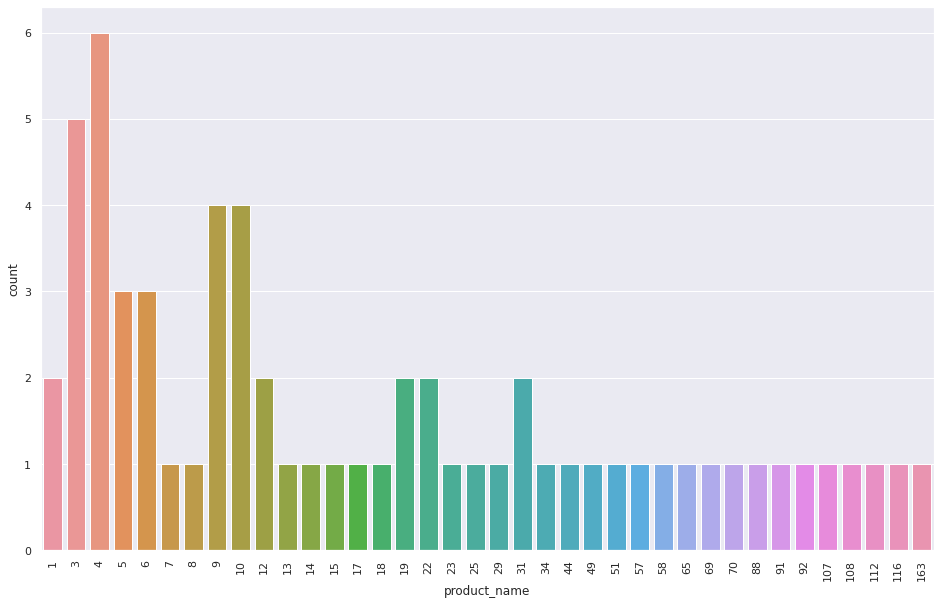

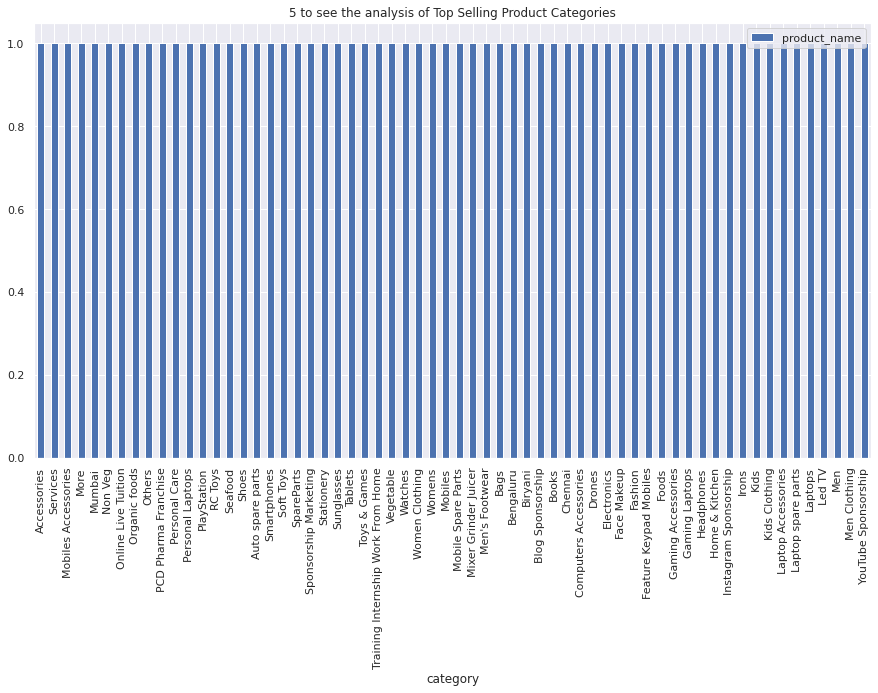

In [82]:
enter5()

### Enter 6 to see the analysis of Reviews for All Product Categories

In [23]:
prod_review = review.groupby(['category','stars'])['product_name']
prod_review

In [24]:
prod_review = review.groupby(['category','stars'])['product_name'].count()
prod_review.to_csv('category_stars.csv')
prod_review=pd.read_csv('category_stars.csv')
prod_review=pd.pivot_table(prod_review,values=None,index=['category'],columns=['stars'],fill_value=0,aggfunc=np.sum)

In [25]:
# extracting orders that got 5 stars
fivestar_review=review[review['stars']==5]

star_review = fivestar_review.groupby(['category','stars'])['product_name'].count()
star_review.to_csv('category_stars.csv')

star_review = pd.read_csv('category_stars.csv')
star_review = pd.pivot_table(star_review,values=None,index=['category'],columns=['stars'],fill_value=0,aggfunc=np.sum)

cat_review = review.groupby(['category','status'])['product_name'].count()
cat_review.to_csv('category_status.csv')

cat_review = pd.read_csv('category_status.csv')
cat_review = pd.pivot_table(cat_review,values=None,index=['category'],columns=['status'],fill_value=0,aggfunc=np.sum)

In [83]:
def enter6():
  star_review.plot(kind='bar',figsize=(15,8), title='The analysis of Product Reviews with stars(Using Bar plot)')
  plt.savefig('6.1.pdf')
  cat_review.plot(kind='bar',figsize=(15,8), title='The analysis of Product Reviews with category(Using Bar plot)')
  plt.savefig('6.2.pdf')

### 7 to see the analysis of Number of Orders Per Month Per Year

In [27]:
states = states.rename({'Order #':'Orders'}, axis=True)

In [28]:
# nom = states.groupby('month')['Orders'].count()
# noy = states.groupby('year')['Orders'].count()
# #nom.plot(kind='bar',figsize=(15,8), xlabel='Months', ylabel='Orders', title='5 to see the analysis of Top Selling Product Categories')
# noy.nlargest(12).plot(kind='bar',figsize=(10,6), title='7 to see the analysis of Number of Orders Per Month Per Year')

In [84]:
def enter7():
  # nom.plot(kind='bar',figsize=(10,6), title='7 to see the analysis of Number of Orders Per Month Per Year')
  # noy.plot(kind='hist',figsize=(10,6), title='7 to see the analysis of Number of Orders Per Month Per Year')
  plt.figure(figsize=(16,10))
  plt.title('The analysis of Number of Orders Per Month Per Year')
  ax=sns.countplot(data = states, x='month')
  ax.figure.savefig('7.1.pdf')
  plt.xticks(rotation=90)
  plt.figure(figsize=(16,10))
  ax=sns.countplot(data = states, x='year')
  plt.xticks(rotation=90)
  plt.savefig('7.2.pdf')

## 8 to see the analysis of Reviews for Number of Orders Per Month Per Year

In [30]:
states.rename({'LineItem Name':'product_name'},axis=1, inplace=True)

In [31]:
aaa = states.merge(review, on='product_name', how='left')

In [32]:
aaa['status'].fillna('No review', inplace=True)

In [85]:
def enter8():
  aaa[['status','year']].value_counts().plot(kind='bar', title='The analysis of Number of Orders Per Month Per Year')
  plt.savefig('8.1.pdf')

### 9 to see the analysis of Number of Orders Across Parts of a Day

In [34]:
ab = aaa['hour'].value_counts()

In [35]:
part_of_day = aaa['hour']
aaa['part of day'] = part_of_day

In [36]:
def hrs(value):
  if(5<value<12):
      return('Morning')
  elif(12<=value<17):
      return('AfterNoon')
  elif(17<=value<21):
      return('Evening')
  else:
      return('Night')
aaa['part of day'] = aaa['part of day'].apply(hrs)

In [86]:
def enter9():
  pod = aaa['part of day'].value_counts().plot(kind='bar', title='The analysis of Number of Orders Across Parts of a Day')
  plt.savefig('9.1.pdf')
  fig = px.bar(pod, title="Order MonthWise Analysis")

In [87]:
prob_statement = '''Enter 1 to see the analysis of Reviews given by Customers

Enter 2 to see the analysis of different payment methods used by the Customers

Enter 3 to see the analysis of Top Consumer States of India

Enter 4 to see the analysis of Top Consumer Cities of India

Enter 5 to see the analysis of Top Selling Product Categories

Enter 6 to see the analysis of Reviews for All Product Categories

Enter 7 to see the analysis of Number of Orders Per Month Per Year

Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year

Enter 9 to see the analysis of Number of Orders Across Parts of a Day

Enter 10 to see the Full Report'''

In [ ]:
n = int(input(f'{prob_statement}\n\nEnter any number between 1 to 10 : '))
## See the Analysis of Reviews given by Customers
if n ==1:
  enter1()
elif n ==2:
  enter2()

elif n ==3:
  enter3()

elif n ==4:
  enter4

elif n ==5:
  enter5()

elif n == 6:
  enter6()

elif n == 7:
  enter7()

elif n ==8:
  enter8()

elif n ==9:
  enter9()

elif n == 10:
  enter1(), enter2(), enter3(), enter4(), enter5(), enter6(), enter7(), enter8(), enter9()

In [ ]:
!pip install pikepdf

In [91]:
from glob import glob

from pikepdf import Pdf

pdf = Pdf.new()

for file in glob('*.pdf'):  # you can change this to browse directories recursively
    with Pdf.open(file) as src:
        pdf.pages.extend(src.pages)

pdf.save('Output.pdf')
pdf.close()